# Time Series Forecasting for Food and Ag Applications
Bryan C. Runck

# 1.0 Overview
This notebook provides a demonstration for basic time series forecasting techniques with specific application to food and ag application areas. The technique of focus here is Geometric Brownian Motion, which is used in quantitative finance to implement the Black-Scholes model of stocks. 

In the following, we
1. describe Geometric Brownian Motion as the basis for simulating stochastic processes (e.g. random, noisy processes), 
2. consider it's application to different domains (physics, chemical systems, geography), and 
3. then describe how quantitative finance techniques can be used to model the movement of stocks and commodities in the agrifood sector.

# 2.0 What is Brownian Motion?
“The Brownian movement was discovered in 1827 by Robert Brown, a botanist. While he was studying microscopic life, he noticed little particles of plant pollens jiggling around in the liquid he was looking at in the microscope, and he was wise enough to realize that these were not living, but were just little pieces of dirt moving around in the water. In fact he helped to demonstrate that this had nothing to do with life by getting from the ground an old piece of quartz in which there was some water trapped. It must have been trapped for millions and millions of years, but inside he could see the same motion. What one sees is that very tiny particles are jiggling all the time.”  - Feynman, [Lectures](https://www.feynmanlectures.caltech.edu/I_41.html)




![BM](https://j.gifs.com/v11QMZ.gif)

**Figure 1. Pollens in grains for water.**

## 2.1 Formalism
See section 18.8.2 of Wu and Buyya 2015 [link](https://www.sciencedirect.com/science/article/pii/B9780128014134000180).

## 2.2 Brownian Motion and Random Walks
Brownian motion can be thought of as an algorithm, known as a random walk. This algorithm most often operates on one, two, or three dimensions depending on the phenomena being represented.

There are two parts of the system. The first is space in one, two, or three dimensions. The second is a particle. The particle can represent a commodity price, stock, insect, molecule, or many other things.

The particle remembers three things:
1. It's current location
2. Where it has been
2. It's rules of movement (which are probabilistic for a random walk)


#### 2.2.1 A Simple Algorithm
The algorithm for a particle in two dimensions would be
1. Set starting location in "current location" memory
2. Randomly move to a new location that is within 1 meter away from my "current location"
3. Save current location in "where I've been" memory
4. Save the new location in "current location"
5. Repeat steps 2-4 for 100 times and stop

At the end, the points stored in "where I've been" memory is the history of the random walk.

We can implement this in code.

#### 2.2.2 A Simple Implementation of a Random Walk

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [100]:
class particle(object):
    
    def __init__(self, x_start, y_start, simulation_duration):
        #1. Set Starting location in "current location" memory
        self.simulation_duration = simulation_duration
        self.time_steps_remaining = simulation_duration
        self.current_x = x_start
        self.current_y = y_start
        self.where_Ive_been_x = [] # create an empty memory
        self.where_Ive_been_y = []
        
        
    def step(self):
        # save where I currently am to memory
        self.save_where_Ive_been()
        
        # Randomly move to a new location within 1 meter from current location
        self.move()
        
        # one fewer step until complete
        self.time_steps_remaining = self.time_steps_remaining - 1
    
    
    
    def move(self):
        self.current_x = self.current_x + np.random.uniform(-1, 1)
        self.current_y = self.current_y + np.random.uniform(-1, 1)
        
    
    def save_where_Ive_been(self):
        '''
        This is the particle's "memory"
        so we can plot where it went over time.
        '''
        self.where_Ive_been_x.append(self.current_x)
        self.where_Ive_been_y.append(self.current_y)
        
        
    def run(self):
        '''
        Runs the simulation for the duration specified
        '''
        while self.time_steps_remaining > 0:
            self.step()

In [101]:
insect = particle(0,30,1000)

In [102]:
insect.step()

In [103]:
insect.run()

#### 2.2.3 Visualize Random Walk
Show where the insect went.

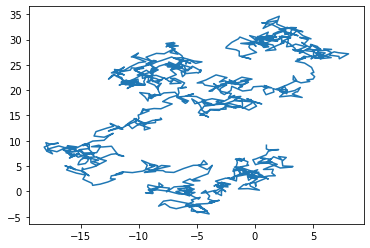

In [104]:
plt.plot(insect.where_Ive_been_x, insect.where_Ive_been_y)
plt.show()

## What makes Brownian Motion "Geometric"?
Brownian motion above is "arithmetic" - we're use plus signs. Geometric Brownian motion is because an exponential distribution is assumed for the underlying process, distributions common across complex systems. This explains why in the next section we see a lot of log transformations.




![image](https://ars.els-cdn.com/content/image/3-s2.0-B9780128014134000180-f18-25-9780128014134.jpg)

Figure 18.25 from Wu and Buyya 2015 [link](https://www.sciencedirect.com/science/article/pii/B9780128014134000180). Wiener process or standard Brownian motion.

In [108]:
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

class stochasticprocess(object):
    '''Brownian Motion'''
    '''iterative generation of an asset's price over time; need to know where we are and where we're going'''
    
    def time_step(self):
        '''generate price based on where we are'''
        dW = np.random.normal(0, math.sqrt(self.delta_t)) #change in brownian motion
        dS = self.drift*self.delta_t*self.current_asset_price+self.volatility*self.current_asset_price*dW #use that motion to update asset price
        '''we drift per unit time; this could be reconstrued probabilistically instead'''
        
        self.asset_prices.append(self.current_asset_price + dS)
        self.current_asset_price = self.current_asset_price + dS
    
    def __init__(self, drift, volatility, delta_t, initial_asset_price):
        self.drift = drift #where we're going
        self.volatility = volatility #where we're going
        self.delta_t = delta_t #how far forward in time we're going
        self.current_asset_price = initial_asset_price # where we are
        self.asset_prices = [initial_asset_price]

In [109]:
p = stochasticprocess(.2, .3, 1/365, 300) # instantiate the model

In [110]:
p.time_step() # do one time step

In [111]:
p.asset_prices

[300, 300.721014396013]

In [112]:
processes = []
for i in range(0, 100):
    processes.append(stochasticprocess(.2, .1, 1/365, 300)) 
    #use historical returns to derive drift, volatility, daily bars, current asset price
    

for process in processes:
    tte = 1 #year
    while(tte - process.delta_t >0): #delta_t in days
        process.time_step()
        tte = tte - process.delta_t

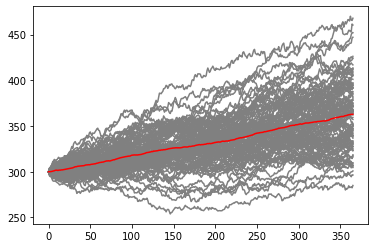

In [113]:
x=np.arange(0,len(processes[0].asset_prices))

for process in processes:
    plt.plot(x, process.asset_prices, color='grey')


average = np.zeros(len(processes[0].asset_prices))
for process in processes:
    average = np.array(process.asset_prices) + average

average = average/len(processes)    

plt.plot(x, average, color='red')
plt.show()